# Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import urllib.request
import io
import zipfile

### Undirected network attacks function

In [2]:
def undirected_network_attack(G, step):
    
    if not nx.is_connected(G):
        print("The graph is not connected. From now, the giant component will be considered as the graph.")
        G=G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0]).copy()

    G_random_attack=G.copy()
    G_betweenness_attack=G.copy()
    G_pagerank_attack=G.copy()
    G_high_dregree_attack=G.copy()
    
    starting_diameter=nx.diameter(G)
    tot_nodes=nx.number_of_nodes(G)
    f_list=np.arange(0, (1+step/tot_nodes), step/tot_nodes)

    # BETWEENNESS ATTACK
    diameter_list_betweenness=np.zeros(len(f_list))
    diameter_list_betweenness[0]=starting_diameter
    giant_component_size_list_betweeness=np.zeros(len(f_list))
    giant_component_size_list_betweeness[0]=len(G)
 
    i=1
    print("\nBetwenness attack: \n")

    while nx.number_of_nodes(G_betweenness_attack)>=step+1 and i<len(f_list): 
    
        # Find node with highest betweenness 
        betweenness_dict=nx.betweenness_centrality(G_betweenness_attack)
        sorted_key=sorted(betweenness_dict, key=betweenness_dict.get, reverse=True)

        # Remove nodes with highest betweenness
        G_betweenness_attack.remove_nodes_from(sorted_key[:step])

        if not nx.is_connected(G_betweenness_attack):  
            G_betweenness_attack=G_betweenness_attack.subgraph(sorted(nx.connected_components(G_betweenness_attack), key=len, reverse=True)[0]).copy()
          
        print("Step: ", i)
        giant_component_size_list_betweeness[i]=nx.number_of_nodes(G_betweenness_attack)
        diameter_list_betweenness[i]=nx.diameter(G_betweenness_attack)
        print("Remaining nodes: {}".format(nx.number_of_nodes(G_betweenness_attack)))
        i+=1
       
    # HIGH DEGREE ATTACK
    diameter_list_deg=np.zeros(len(f_list))
    diameter_list_deg[0]=starting_diameter
    giant_component_size_list_deg=np.zeros(len(f_list))
    giant_component_size_list_deg[0]=len(G)

    i=1
    print("\nHigh degree attack: \n")

    while nx.number_of_nodes(G_high_dregree_attack)>=step+1 and i<len(f_list): 
        
        # Degree of the nodes
        degree_dict=dict(G_high_dregree_attack.degree)
        sorted_key=sorted(degree_dict, key=degree_dict.get, reverse=True)
       
        # Remove node with highest degree
        G_high_dregree_attack.remove_nodes_from(sorted_key[:step])
   
        if not nx.is_connected(G_high_dregree_attack):  
            G_high_dregree_attack=G_high_dregree_attack.subgraph(sorted(nx.connected_components(G_high_dregree_attack), key=len, reverse=True)[0]).copy()
            
        print("Step: ", i)
        giant_component_size_list_deg[i]=nx.number_of_nodes(G_high_dregree_attack)
        diameter_list_deg[i]=nx.diameter(G_high_dregree_attack)
        print("Remaining nodes: {}".format(nx.number_of_nodes(G_high_dregree_attack)))
        i+=1
                
    #PAGERANK ATTACK
    diameter_list_pagerank=np.zeros(len(f_list))
    diameter_list_pagerank[0]=starting_diameter
    giant_component_size_list_pagerank=np.zeros(len(f_list))
    giant_component_size_list_pagerank[0]=len(G)

    i=1
    print("\nPagerank attack: \n")

    while nx.number_of_nodes(G_pagerank_attack)>=step+1 and i<len(f_list): 
        
        # Computing page rank
        pageRank_dict=nx.pagerank(G_pagerank_attack)

        # Pick the step nodes with maximum pagerank
        sorted_key=sorted(pageRank_dict, key=pageRank_dict.get, reverse=True)

        # Remove the node with highest pagerank
        G_pagerank_attack.remove_nodes_from(sorted_key[:step])

        if not nx.is_connected(G_pagerank_attack):
            G_pagerank_attack=G_pagerank_attack.subgraph(sorted(nx.connected_components(G_pagerank_attack), key=len, reverse=True)[0]).copy()
            
        print("Step: ", i)       
        giant_component_size_list_pagerank[i]=nx.number_of_nodes(G_pagerank_attack)
        diameter_list_pagerank[i]=nx.diameter(G_pagerank_attack)
        print("Remaining nodes: {}".format(nx.number_of_nodes(G_pagerank_attack)))
        i+=1
        
    # RANDOM NODE ATTACK
    diameter_list_random=np.zeros(len(f_list))
    diameter_list_random[0]=starting_diameter
    giant_component_size_list_random=np.zeros(len(f_list))
    giant_component_size_list_random[0]=len(G)

    i=1
    print("\nRandom node attack: \n")
    
    while nx.number_of_nodes(G_random_attack)>=step+1 and i<len(f_list): 
        
        # Pick random node
        nodes_list=list(G_random_attack.nodes)
        random_nodes=random.sample(nodes_list, step)
        
        # Remove random node
        G_random_attack.remove_nodes_from(random_nodes)
        if not nx.is_connected(G_random_attack):
            G_random_attack=G_random_attack.subgraph(sorted(nx.connected_components(G_random_attack), key=len, reverse=True)[0]).copy()
            
        print("Step: ", i)
        giant_component_size_list_random[i]=nx.number_of_nodes(G_random_attack)
        diameter_list_random[i]=nx.diameter(G_random_attack)
        print("Remaining nodes: {}".format(nx.number_of_nodes(G_random_attack)))
        i+=1
    
    # ANALYSIS
    plt.figure(figsize=(15,10))

    plt.plot(f_list, giant_component_size_list_betweeness/tot_nodes, label="Betweenness attack", lw=3)
    plt.plot(f_list, giant_component_size_list_random/tot_nodes, label="Random node attack", lw=3)
    plt.plot(f_list, giant_component_size_list_deg/tot_nodes, label="High degree node attack", lw=3)
    plt.plot(f_list, giant_component_size_list_pagerank/tot_nodes, label="Pagerank attack", lw=3)

    plt.xlabel("f", fontsize=15)
    plt.ylabel("Size of the giant component (fraction)", fontsize=15)
    plt.title("Changes in giant component size", fontsize=20)
    plt.legend(fontsize=15)

    plt.figure(figsize=(15,10))

    plt.plot(f_list, diameter_list_betweenness, label="Betweenness attack", lw=3)
    plt.plot(f_list, diameter_list_random, label="Random node attack", lw=3)
    plt.plot(f_list, diameter_list_deg, label="High degree node attack", lw=3)
    plt.plot(f_list, diameter_list_pagerank, label="Pagerank attack", lw=3)

    plt.xlabel("f", fontsize=15)
    plt.ylabel("Diameter", fontsize=15)
    plt.title("Changes in diameter", fontsize=20)
    plt.legend(fontsize=15)

### Directed network attack function

In [3]:
def directed_network_attack(G, step):
    
    if not nx.is_strongly_connected(G):
        print("The graph is not strongly connected. From now, the giant component will be considered as the graph.")
        G=G.subgraph(sorted(nx.strongly_connected_components(G), key=len, reverse=True)[0]).copy()

    G_random_attack=G.copy()
    G_betweenness_attack=G.copy()
    G_pagerank_attack=G.copy()
    G_high_dregree_attack=G.copy()
    
    starting_diameter=nx.diameter(G)
    tot_nodes=nx.number_of_nodes(G)
    f_list=np.arange(0, (1+step/tot_nodes), step/tot_nodes)

    # BETWEENNESS ATTACK   
    diameter_list_betweenness=np.zeros(len(f_list))
    diameter_list_betweenness[0]=starting_diameter
    giant_component_size_list_betweeness=np.zeros(len(f_list))
    giant_component_size_list_betweeness[0]=len(G)
 
    i=1
    print("\nBetwenness attack: \n")
    
    while nx.number_of_nodes(G_betweenness_attack)>=step+1 and i<len(f_list): 
        
        # Find node with highest betweenness
        betweenness_dict=nx.betweenness_centrality(G_betweenness_attack)
        sorted_key=sorted(betweenness_dict, key=betweenness_dict.get, reverse=True)

        # Remove nodes with highest betweenness
        G_betweenness_attack.remove_nodes_from(sorted_key[:step])

        if not nx.is_strongly_connected(G_betweenness_attack): 
            G_betweenness_attack=G_betweenness_attack.subgraph(sorted(nx.strongly_connected_components(G_betweenness_attack), key=len, reverse=True)[0]).copy()
        
        print("Step: ", i)
        giant_component_size_list_betweeness[i]=nx.number_of_nodes(G_betweenness_attack)
        diameter_list_betweenness[i]=nx.diameter(G_betweenness_attack)
        print("Remaining nodes: {}".format(nx.number_of_nodes(G_betweenness_attack)))
        i+=1
       
    # HIGH DEGREE ATTACK
    diameter_list_deg=np.zeros(len(f_list))
    diameter_list_deg[0]=starting_diameter
    giant_component_size_list_deg=np.zeros(len(f_list))
    giant_component_size_list_deg[0]=len(G)
    
    i=1
    print("\nHigh degree attack: \n")
    
    while nx.number_of_nodes(G_high_dregree_attack)>=step+1 and i<len(f_list): 
        
        # Degree of the nodes
        degree_dict=dict(G_high_dregree_attack.degree)
        sorted_key=sorted(degree_dict, key=degree_dict.get, reverse=True)
       
        # Remove node with highest degree
        G_high_dregree_attack.remove_nodes_from(sorted_key[:step])
   
        if not nx.is_strongly_connected(G_high_dregree_attack):  
            G_high_dregree_attack=G_high_dregree_attack.subgraph(sorted(nx.strongly_connected_components(G_high_dregree_attack), key=len, reverse=True)[0]).copy()
            
        print("Step: ", i)
        giant_component_size_list_deg[i]=nx.number_of_nodes(G_high_dregree_attack)
        diameter_list_deg[i]=nx.diameter(G_high_dregree_attack)
        print("Remaining nodes: {}".format(nx.number_of_nodes(G_high_dregree_attack)))
        i+=1
        
    #PAGERANK ATTACK
    diameter_list_pagerank=np.zeros(len(f_list))
    diameter_list_pagerank[0]=starting_diameter
    giant_component_size_list_pagerank=np.zeros(len(f_list))
    giant_component_size_list_pagerank[0]=len(G)

    i=1
    print("\nPagerank attack: \n")
    
    while nx.number_of_nodes(G_pagerank_attack)>=step+1 and i<len(f_list): 
        
        # Computing page rank
        pageRank_dict=nx.pagerank(G_pagerank_attack)

        # Pick the step nodes with maximum pagerank
        sorted_key=sorted(pageRank_dict, key=pageRank_dict.get, reverse=True)

        # Remove the node with highest pagerank
        G_pagerank_attack.remove_nodes_from( sorted_key[:step] )

        if not nx.is_strongly_connected(G_pagerank_attack):  
            G_pagerank_attack=G_pagerank_attack.subgraph(sorted(nx.strongly_connected_components(G_pagerank_attack), key=len, reverse=True)[0]).copy()
            
        print("Step: ", i)       
        giant_component_size_list_pagerank[i]=nx.number_of_nodes(G_pagerank_attack)
        diameter_list_pagerank[i]=nx.diameter(G_pagerank_attack)
        print("Remaining nodes: {}".format(nx.number_of_nodes(G_pagerank_attack)))
        i+=1
        
    # RANDOM NODE ATTACK
    diameter_list_random=np.zeros(len(f_list))
    diameter_list_random[0]=starting_diameter
    giant_component_size_list_random=np.zeros(len(f_list))
    giant_component_size_list_random[0]=len(G)
    
    i=1
    print("\nRandom node attack: \n")
    
    while nx.number_of_nodes(G_random_attack)>=step+1 and i<len(f_list): 

        # Pick random node
        nodes_list=list(G_random_attack.nodes)
        random_nodes=random.sample(nodes_list, step)
        
        # Remove random node
        G_random_attack.remove_nodes_from(random_nodes)

        if not nx.is_strongly_connected(G_random_attack):  
            G_random_attack=G_random_attack.subgraph(sorted(nx.strongly_connected_components(G_random_attack), key=len, reverse=True)[0]).copy()
            
        print("Step: ", i)
        giant_component_size_list_random[i]=nx.number_of_nodes(G_random_attack)
        diameter_list_random[i]=nx.diameter(G_random_attack)
        print("Remaining nodes: {}".format(nx.number_of_nodes(G_random_attack)))
        i+=1
    
    # ANALYSIS
    plt.figure(figsize=(15,10))

    plt.plot(f_list, giant_component_size_list_betweeness/tot_nodes, label="Betweenness attack", lw=3)
    plt.plot(f_list, giant_component_size_list_random/tot_nodes, label="Random node attack", lw=3)
    plt.plot(f_list, giant_component_size_list_deg/tot_nodes, label="High degree node attack", lw=3)
    plt.plot(f_list, giant_component_size_list_pagerank/tot_nodes, label="Pagerank attack", lw=3)

    plt.xlabel("f", fontsize=15)
    plt.ylabel("Size of the giant component (fraction)", fontsize=15)
    plt.title("Changes in the giant component size", fontsize=20)
    plt.legend(fontsize=15)

    plt.figure(figsize=(15,10))

    plt.plot(f_list, diameter_list_betweenness, label="Betweenness attack", lw=3)
    plt.plot(f_list, diameter_list_random, label="Random node attack", lw=3)
    plt.plot(f_list, diameter_list_deg, label="High degree node attack", lw=3)
    plt.plot(f_list, diameter_list_pagerank, label="Pagerank attack", lw=3)

    plt.xlabel("f", fontsize=15)
    plt.ylabel("Diameter", fontsize=15)
    plt.title("Changes in diameter", fontsize=20)
    plt.legend(fontsize=15)

# Davis Club graph

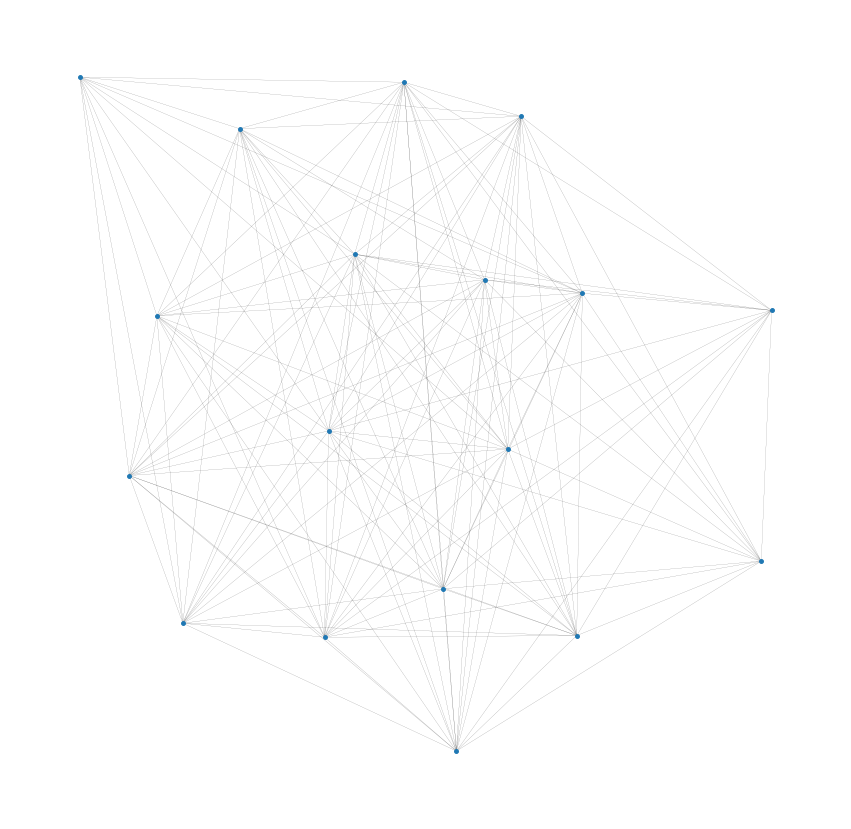

In [4]:
G=nx.davis_southern_women_graph()
women=G.graph["top"]
G=nx.bipartite.projected_graph(G, women)
fig, ax=plt.subplots(figsize=(15,15))
nx.draw(G, node_size=15, width=0.1, ax=ax)

### Computing the main metrics of the graph

In [5]:
nodes=G.number_of_nodes()
edges=G.number_of_edges()
average_degree=edges/nodes
density=average_degree/(nodes-1)
n_triangles=nx.triangles(G)
global_clustering=nx.transitivity(G)
average_clustering=nx.average_clustering(G)
assortativity=nx.degree_pearson_correlation_coefficient(G)

if(nx.is_connected(G)):
    print("The graph is connected.")
    diameter=nx.diameter(G)
    average_shortest_path=nx.average_shortest_path_length(G)
    
print("Graph's size: ", nodes)
print("Graph's number of edges: ", edges)
print("Graph's diameter: ", diameter)
print("Number of triangles: ", n_triangles)
print("Graph's average degree: ", average_degree)
print("Graph's density: ", density)
print("Graph's global clustering: ", global_clustering)
print("Graph's average clustering: ", average_clustering)
print("Graph's average shortest path: ", average_shortest_path)
print("Graph's assortativity: ", assortativity)

The graph is connected.
Graph's size:  18
Graph's number of edges:  139
Graph's diameter:  2
Number of triangles:  {'Evelyn Jefferson': 122, 'Laura Mandeville': 101, 'Theresa Anderson': 122, 'Brenda Rogers': 101, 'Charlotte McDowd': 55, 'Frances Anderson': 101, 'Eleanor Nye': 101, 'Pearl Oglethorpe': 112, 'Ruth DeSand': 122, 'Verne Sanderson': 122, 'Myra Liddel': 112, 'Katherina Rogers': 112, 'Sylvia Avondale': 122, 'Nora Fayette': 122, 'Helen Lloyd': 122, 'Dorothy Murchison': 112, 'Olivia Carleton': 66, 'Flora Price': 66}
Graph's average degree:  7.722222222222222
Graph's density:  0.4542483660130719
Graph's global clustering:  0.9283962726826875
Graph's average clustering:  0.9366868969810146
Graph's average shortest path:  1.091503267973856
Graph's assortativity:  -0.17639198218262792


### Attacks


Betwenness attack: 

Step:  1
Remaining nodes: 17
Step:  2
Remaining nodes: 16
Step:  3
Remaining nodes: 15
Step:  4
Remaining nodes: 14
Step:  5
Remaining nodes: 13
Step:  6
Remaining nodes: 12
Step:  7
Remaining nodes: 11
Step:  8
Remaining nodes: 10
Step:  9
Remaining nodes: 9
Step:  10
Remaining nodes: 8
Step:  11
Remaining nodes: 5
Step:  12
Remaining nodes: 4
Step:  13
Remaining nodes: 3
Step:  14
Remaining nodes: 2
Step:  15
Remaining nodes: 1

High degree attack: 

Step:  1
Remaining nodes: 17
Step:  2
Remaining nodes: 16
Step:  3
Remaining nodes: 15
Step:  4
Remaining nodes: 14
Step:  5
Remaining nodes: 13
Step:  6
Remaining nodes: 12
Step:  7
Remaining nodes: 11
Step:  8
Remaining nodes: 10
Step:  9
Remaining nodes: 9
Step:  10
Remaining nodes: 8
Step:  11
Remaining nodes: 5
Step:  12
Remaining nodes: 4
Step:  13
Remaining nodes: 3
Step:  14
Remaining nodes: 2
Step:  15
Remaining nodes: 1

Pagerank attack: 

Step:  1
Remaining nodes: 17
Step:  2
Remaining nodes: 16
Step:  3


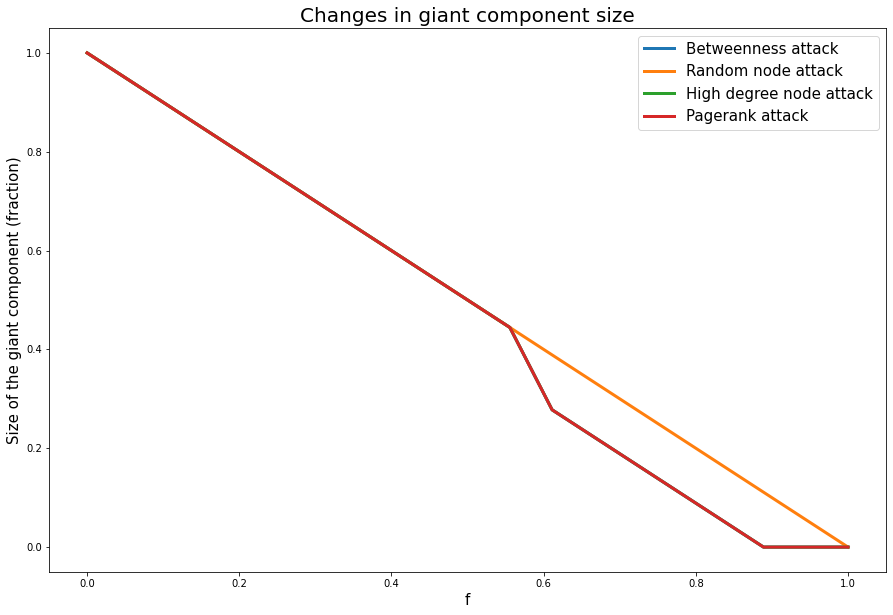

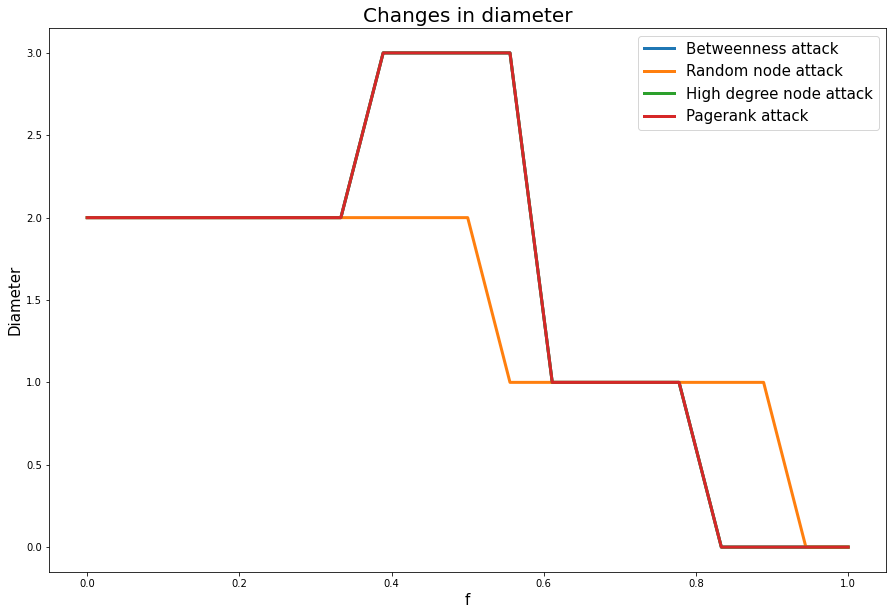

In [6]:
undirected_network_attack(G, 1)

# Football graph

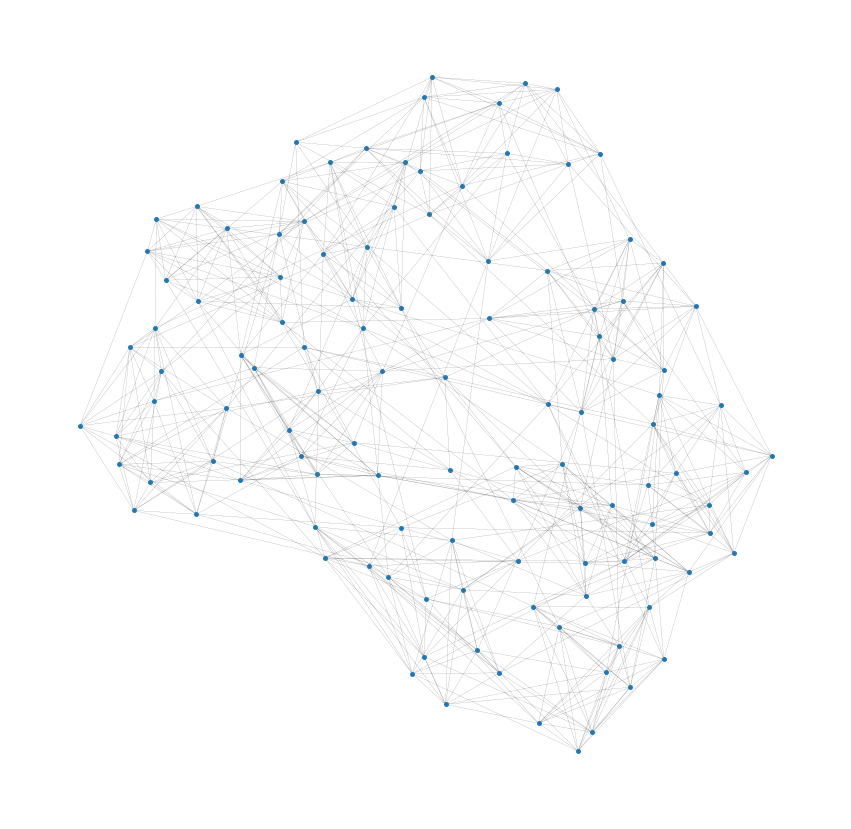

In [7]:
url="http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock=urllib.request.urlopen(url)
s=io.BytesIO(sock.read())
sock.close()

zf=zipfile.ZipFile(s) 
txt=zf.read("football.txt").decode() 
gml=zf.read("football.gml").decode()  
gml=gml.split("\n")[1:]
G=nx.parse_gml(gml)
fig, ax=plt.subplots(figsize=(15,15))
nx.draw(G, node_size=15, width=0.1, ax=ax)

### Computing the main metrics of the graph

In [8]:
nodes=G.number_of_nodes()
edges=G.number_of_edges()
average_degree=edges/nodes
density=average_degree/(nodes-1)
global_clustering=nx.transitivity(G)
average_clustering=nx.average_clustering(G)
assortativity=nx.degree_pearson_correlation_coefficient(G)

if(nx.is_connected(G)):
    print("The graph is connected.")
    diameter=nx.diameter(G)
    average_shortest_path=nx.average_shortest_path_length(G)
    
print("Graph's size: ", nodes)
print("Graph's number of edges: ", edges)
print("Graph's diameter: ", diameter)
print("Graph's average degree: ", average_degree)
print("Graph's density: ", density)
print("Graph's global clustering: ", global_clustering)
print("Graph's average clustering: ", average_clustering)
print("Graph's average shortest path: ", average_shortest_path)
print("Graph's assortativity: ", assortativity)

The graph is connected.
Graph's size:  115
Graph's number of edges:  613
Graph's diameter:  4
Graph's average degree:  5.3304347826086955
Graph's density:  0.0467581998474447
Graph's global clustering:  0.4072398190045249
Graph's average clustering:  0.40321601104209814
Graph's average shortest path:  2.5081617086193746
Graph's assortativity:  0.16244224957446993



Betwenness attack: 

Step:  1
Remaining nodes: 114
Step:  2
Remaining nodes: 113
Step:  3
Remaining nodes: 112
Step:  4
Remaining nodes: 111
Step:  5
Remaining nodes: 110
Step:  6
Remaining nodes: 109
Step:  7
Remaining nodes: 108
Step:  8
Remaining nodes: 107
Step:  9
Remaining nodes: 106
Step:  10
Remaining nodes: 105
Step:  11
Remaining nodes: 104
Step:  12
Remaining nodes: 103
Step:  13
Remaining nodes: 102
Step:  14
Remaining nodes: 101
Step:  15
Remaining nodes: 100
Step:  16
Remaining nodes: 99
Step:  17
Remaining nodes: 98
Step:  18
Remaining nodes: 97
Step:  19
Remaining nodes: 96
Step:  20
Remaining nodes: 95
Step:  21
Remaining nodes: 94
Step:  22
Remaining nodes: 93
Step:  23
Remaining nodes: 92
Step:  24
Remaining nodes: 91
Step:  25
Remaining nodes: 90
Step:  26
Remaining nodes: 89
Step:  27
Remaining nodes: 88
Step:  28
Remaining nodes: 87
Step:  29
Remaining nodes: 86
Step:  30
Remaining nodes: 85
Step:  31
Remaining nodes: 51
Step:  32
Remaining nodes: 50
Step:  33
Re

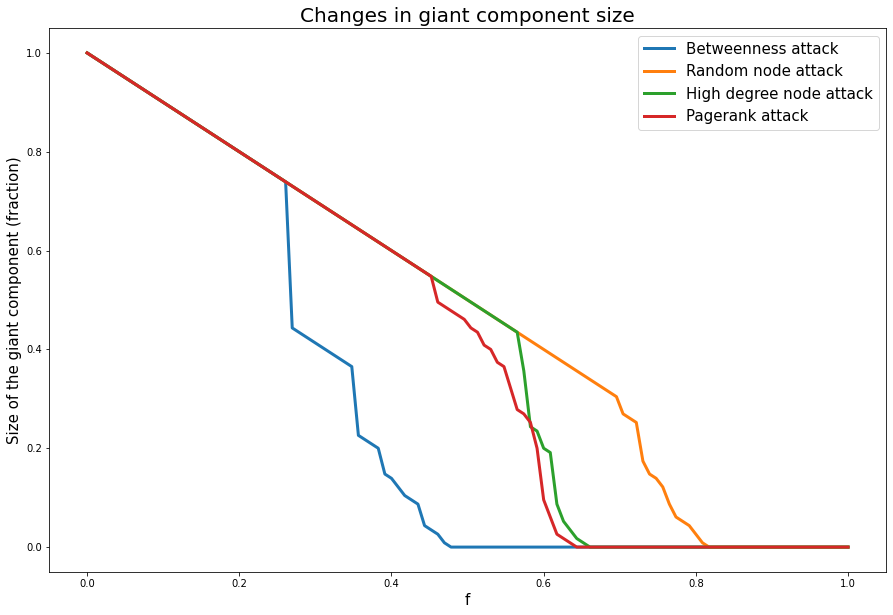

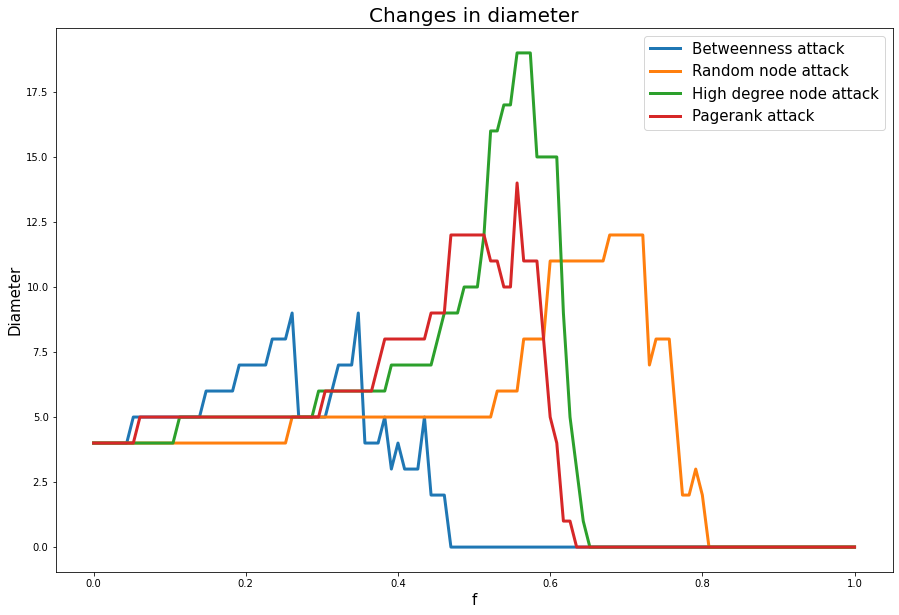

In [9]:
undirected_network_attack(G, 1)

# Wikipedia Vote graph

### Reading the graph

In [10]:
G=nx.read_edgelist("data.txt", create_using=nx.DiGraph(), nodetype=int)

### Taking and displaying a subgraph

In [ ]:
print("The graph is too large for our attacks' simulations. From now, a subgraph of the giant component will be considered as the graph.")
graph_connected_components=sorted(nx.strongly_connected_components(G), key=len, reverse=True)
giant_component=G.subgraph(graph_connected_components[0])
G=giant_component
nodes=list(G.nodes)
new_nodes=random.sample(nodes, 800)
G=G.subgraph(new_nodes)
fig, ax=plt.subplots(figsize=(15,15))
nx.draw(G, node_size=15, width=0.1, ax=ax)

The graph is too large for our attacks' simulations. From now, a subgraph of the giant component will be considered as the graph.


### Computing the main metrics of the graph and the giant component

In [ ]:
nodes=G.number_of_nodes()
edges=G.number_of_edges()
average_degree=edges/nodes
density=average_degree/(nodes-1)
global_clustering=nx.transitivity(G)
average_clustering=nx.average_clustering(G)
assortativity=nx.degree_pearson_correlation_coefficient(G)

if(nx.is_strongly_connected(G)):
    print("The graph is strongly connected.")
    diameter=nx.diameter(G)
    average_shortest_path=nx.average_shortest_path_length(G)
    print("Graph's size: ", nodes)
    print("Graph's number of edges: ", edges)
    print("Graph's diameter: ", diameter)
    print("Graph's average degree: ", average_degree)
    print("Graph's density: ", density)
    print("Graph's global clustering: ", global_clustering)
    print("Graph's average clustering: ", average_clustering)
    print("Graph's average shortest path: ", average_shortest_path)
    print("Graph's assortativity: ", assortativity)
else:
    print("The graph is not strongly connected.")
    graph_connected_components=sorted(nx.strongly_connected_components(G), key=len, reverse=True)
    giant_component=G.subgraph(graph_connected_components[0])
    giant_component_nodes=giant_component.number_of_nodes()
    giant_component_edges=giant_component.number_of_edges()
    giant_component_diameter=nx.diameter(giant_component)
    giant_component_average_degree=giant_component_edges/giant_component_nodes
    giant_component_density=giant_component_average_degree/(giant_component_nodes-1)
    giant_component_global_clustering=nx.transitivity(giant_component)
    giant_component_average_clustering=nx.average_clustering(giant_component)
    giant_component_average_shortest_path_length=nx.average_shortest_path_length(giant_component)
    giant_component_assortativity=nx.degree_pearson_correlation_coefficient(giant_component)
    print("Graph's size: ", nodes)
    print("Graph's number of edges: ", edges)
    print("Graph's average degree: ", average_degree)
    print("Graph's density: ", density)
    print("Graph's global clustering: ", global_clustering)
    print("Graph's average clustering: ", average_clustering)
    print("Graph's assortativity: ", assortativity)
    print("Giant component's size: ", giant_component_nodes)
    print("Giant component's number of edges: ", giant_component_edges)
    print("Giant component's diameter: ", giant_component_diameter)
    print("Giant component's average degree: ", giant_component_average_degree)
    print("Giant component's density: ", giant_component_density)
    print("Giant component's global clustering: ", giant_component_global_clustering)
    print("Giant component's average clustering: ", giant_component_average_clustering)
    print("Giant component's average shortest path lenght: ", giant_component_average_shortest_path_length)
    print("Giant component's assortativity: ", giant_component_assortativity)

### Attacks

In [ ]:
directed_network_attack(G, 1)